<a href="https://colab.research.google.com/github/AIMosta/All-About-AI-Python-Edition/blob/master/Course%206-%20Unsupervised%20learning/AAA_ped_w6_c1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://docs.google.com/uc?export=download&id=1ap18raVTUCSJeGzTLz9kViroFGvTknrV">
# Unspervised Learning: Clustering

>[Unspervised Learning: Clustering](#scrollTo=b9q-VxEW5tRs)

>[1- clustering](#scrollTo=1oBho425Q7ca)

>>[Unsupervised Learning](#scrollTo=PTsXuubynLHY)

>>[Clustering](#scrollTo=a1bTFc9bnLZu)

>>[K-Mean Algorithm](#scrollTo=I0mTWFEcnLpw)

>[2-K-mean example](#scrollTo=UGNJc3cBQfYY)

>>[The Data](#scrollTo=yLvtrsm0RcWq)

>>[Training](#scrollTo=A8DvRRWlRdGi)

>>[Visulaization](#scrollTo=OjzIaOe1RdZ2)

>[3-  Silouhette scores](#scrollTo=Nhm8OJc_RFU8)

>>[Definition](#scrollTo=O7cibba16mLG)

>>[Use](#scrollTo=3syoaBkI74VQ)

>[Example](#scrollTo=nOurFtOg8Ora)

>[4- mean-shift](#scrollTo=VL49qQMiRCfC)

>>[Concept & Steps](#scrollTo=QtI6YjSJRzo8)

>>[Example](#scrollTo=Tg2exEipRz7w)

>>[Bandwidth](#scrollTo=lYnbKQUdR0Ou)

>[5- Guassian mixture model](#scrollTo=Ca8Ofrs7RHwC)

>>[Concept](#scrollTo=xn8bZSmqSBwY)

>>[Example with scikit-learn](#scrollTo=157T7zEfSB_u)

>>[Selection of n_components](#scrollTo=ArfuFPFFSB4a)

>[6- Affinity Propagation model](#scrollTo=5aXVjrUrRNGi)

>>[Concept](#scrollTo=H71qigLHSGU2)

>>[Process](#scrollTo=yMgLDZAdSGjG)

>>[Example](#scrollTo=Z7prBx0pSGbS)

>[References](#scrollTo=tSbN2yDrRSdW)



# 1- clustering


## Unsupervised Learning
* Unsupervised learning is about Machine Learning using Unlabeled Data.

* It concerns several kind of tasks, that can be grouped into **3** categories:

  * Clustering
  * Visualization and Dimensionality reduction
  * Association Rule Learning


## Clustering
* **Clustering** means finding the** clusters** within a given **data**.

* A **cluster** can be defined as a **group** of **similar points** (samples) of data.

* One way to identify similar points, is to use **similarity metrics**.
**Euclidean Distance** in one of these similarity metrics.

##K-Mean Algorithm

* it is one of the methods used in clustering. It uses the euclidean distance as a similarity metric.
The steps are as follow:


1.   Set the number of clusters to be find: K
2.   Select randomly : k samples from the data ,or use an algorithm to select generally distant k points. The k samples are the initial centroids of the clusters.
3.   Divide the samples into these K clusters: for each sample:
Compute the distances from each centroid
Select the least one.
4.   Compute the new centroids of clusters u:j the mean of the samples belonging to each cluster
5.   Compute the inertia, for n samples, 
using this formula:  $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
6.   Repeat from step 3, until the inertia is minimized, or the clusters assignment do not change or a maximum number of iterations is reached




# 2-K-mean example


## The Data
* We will use the file shared by [Artificial Intelligence with Python](https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git)

In [0]:
# we will use the data available at https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git
!rm -R AAA-Ped-Week6
!git clone https://github.com/AIMosta/AAA-Ped-Week6.git

Cloning into 'AAA-Ped-Week6'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
!ls AAA-Ped-Week6


A3P-w6-data_clustering.txt  README.md


In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from pandas import DataFrame as DF, Series as S

In [0]:
dataF = pd.read_csv('AAA-Ped-Week6/A3P-w6-data_clustering.txt',header=-1)
dataF.head(5)


,0,1
0,2.08,1.05
1,2.05,7.70
2,4.53,5.49
3,6.23,1.02
4,5.35,7.86


In [0]:
X= dataF.values
print (X.shape)

(350, 2)


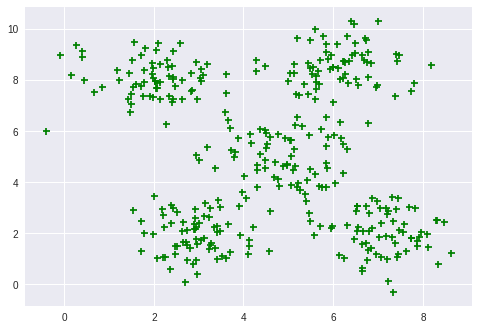

In [0]:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+',c="g")


## Training

In [0]:
# initialize the number of the clusters
num_clusters = 5
# Create KMeans object using random centroid initalization
kmeans = KMeans(init='random', n_clusters=num_clusters,verbose=1, n_init=1)

In [0]:
# Train the KMeans clustering model
kmeans.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1110.0300083942802
start iteration
done sorting
end inner loop
Iteration 1, inertia 1012.8587443839103
start iteration
done sorting
end inner loop
Iteration 2, inertia 1002.444845248496
start iteration
done sorting
end inner loop
Iteration 3, inertia 1000.4001365690789
start iteration
done sorting
end inner loop
Iteration 4, inertia 1000.2107315861655
start iteration
done sorting
end inner loop
Iteration 5, inertia 999.3857315546138
start iteration
done sorting
end inner loop
Iteration 6, inertia 999.133255042761
start iteration
done sorting
end inner loop
Iteration 7, inertia 999.133255042761
center shift 0.000000e+00 within tolerance 6.415290e-04


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [0]:
# the final centroids are
final_Centroids=kmeans.cluster_centers_

final_Centroids

array([[7.09588235, 2.01735294],
       [2.98576923, 3.51076923],
       [3.98220588, 8.34404412],
       [2.97698113, 1.62773585],
       [5.22791045, 5.19985075]])

## Visulaization

In [0]:
kmeans.labels_

array([3, 2, 4, 0, 2, 3, 2, 4, 4, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 1, 2,
       4, 3, 4, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 1, 2, 4, 0,
       2, 1, 2, 4, 0, 2, 3, 2, 4, 0, 2, 1, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3,
       2, 4, 0, 2, 1, 2, 4, 0, 4, 3, 2, 2, 0, 2, 1, 2, 4, 0, 2, 3, 2, 4,
       0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 1, 0, 2, 3, 2, 4, 0, 2,
       1, 2, 4, 0, 2, 3, 2, 2, 0, 2, 3, 2, 4, 0, 4, 3, 2, 4, 0, 2, 3, 2,
       4, 0, 2, 3, 2, 1, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0,
       2, 1, 2, 4, 0, 2, 3, 2, 4, 0, 2, 1, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3,
       2, 1, 0, 4, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 1, 0, 2, 3, 2, 4,
       0, 2, 3, 2, 4, 0, 2, 3, 2, 1, 0, 2, 3, 2, 1, 0, 2, 1, 2, 4, 0, 2,
       1, 1, 4, 0, 2, 1, 2, 4, 0, 2, 3, 2, 2, 0, 2, 1, 2, 4, 0, 2, 3, 2,
       4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0,
       2, 3, 2, 1, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 2, 3, 2, 4, 0, 4, 3,
       2, 4, 0, 2, 3, 2, 4, 0, 2, 1, 2, 4, 0, 4, 1,

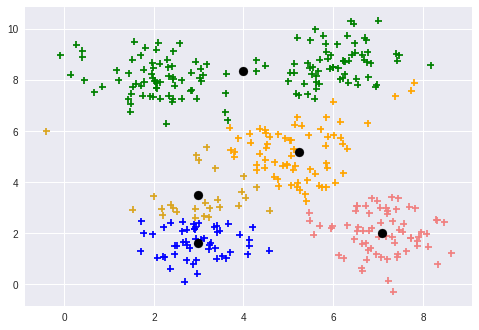

In [0]:
clus_colors=[ "goldenrod" if y ==1 else "green" if y == 2 else "blue" if y==3 else "orange" if y== 4
             else "lightcoral" for y in kmeans.labels_]

plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+',c=clus_colors)
plt.scatter(final_Centroids[:,0],final_Centroids[:,1],marker="o",facecolor="black",
             s =80)


# 3-  Silouhette scores

## Definition
* **Silhouette score** is a measure that is used to indicate the quality of the clustering: it shows at which degree the data  samples are similar to the others samples belonging to the same cluster.

* For one sample, it is computed as follow:  $s= \frac { b - a }  {  max (a,b)}$
Where:
 * $a$: the mean distance between a sample and all other samples in the same cluster.
 * $b$: the mean distance between a sample and all other samples in the next nearest cluster.
* The **distance** is computed by considering the samples as points and the features as coordinates. The distance between two samples, is computed as the euclidean distance between 2 points.
> For example: the distance between $c(x1,y1)$ and $d(x2,y2)$ is computed as follow:  $\sqrt{( x_2 - x_1 )^2 + (y_2 - y_1)^2} $

## Use

* For one sample, the silhouette value score ranges from 1 to -1. Many values close to 1 indicates **good** clustering. And in the other hand, many values close to -1, indicates **bad** clustering (too many or too few clusters). 

* We can compute the overall silhouette score by computing the **mean** of all the samples silhouette scores.
A value close to zero indicates cluster overlapping.

* The overall silhouette score can be used to find the best  **k** number of clusters.

* Sklearn implements the silhouette score calculation: the overall (mean) and the singular coefficient (for one sample).
 * sklearn.metrics.silhouette_score:  the mean
 * klearn.metrics.silhouette_samples:  for each sample

# Example

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


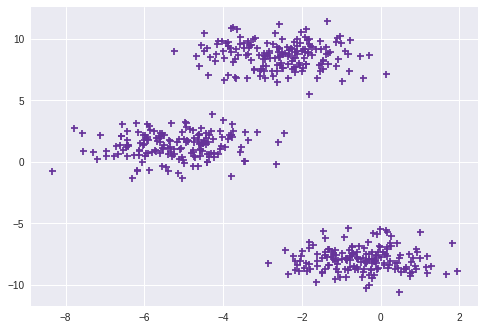

In [0]:
# generate clustred data: 500 samples, described by
# 2 features
X2 , y2 = make_blobs(n_samples=500, n_features=2,centers=3)

# plotting the points
plt.scatter(X2[:,0],X2[:,1],marker ="+", color= "rebeccapurple")
                 


Text(0.5,1,'Silhouette scores')

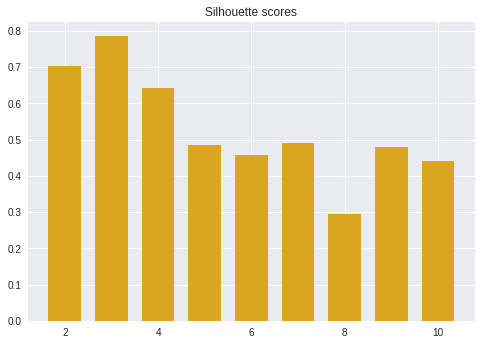

In [0]:
# testing cluster numbers: from 2 to 10
k_values = range(2,11)
scores =[]
for n_clusters in k_values:
  # initialise a kmean clusterer with the actual tested
  # cluster number
  myKmean = KMeans (init='random', n_clusters=n_clusters, n_init=1)
  # train it
  myKmean.fit(X2)
  # compute the ovreall silhouette score
  overall_score=  silhouette_score(X2, myKmean.labels_,metric='euclidean', sample_size=len(X))
  # add it to list of previously computed scores
  scores.append(overall_score)

# plot the scores
plt.figure()
plt.bar(k_values, scores, width=0.7, color='goldenrod', align='center')
plt.title('Silhouette scores')


# 4- mean-shift

## Concept & Steps

* **Mean shift** clustering is an other method used to identify clusters in a dataset. Is supposes that the data distribution may tend to be dense around certain points: the centers of the clusters (centroids).
* To identify these points, it defines the following steps:
 * Make a copy of your data
 * For each sample in the copy, repeat these steps:
    * Compute the mean of samples contained in a window (fixed size) around the sample. The mean is computed as follow:
    $m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}$
    > where $K$  is a function that will affect weights to the neighbors of $x$, regarding their distance from $x $(bigger distance, small weight). $N(x)$ represents the points near $x$(neighbors of $x$). 
    * Update the sample’s location to that new mean: $x_i^{t+1} = m(x_i^t)$

                                             
  * Stop the process when the samples doesn’t move, or the shift is not significant. Then, Filter out near-similar points to keep the final centroids.





## Example

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [0]:
# Cluster data with MeanShift
myMeanShift = MeanShift(bandwidth=2)
myMeanShift.fit(X)

MeanShift(bandwidth=2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

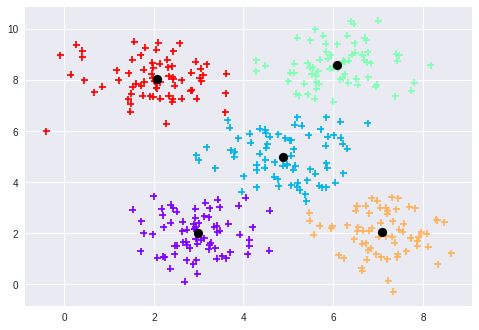

In [0]:
labels = myMeanShift.labels_
final_Centroids2 = myMeanShift.cluster_centers_
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+',c=labels, cmap ="rainbow")
plt.scatter(final_Centroids2[:,0],final_Centroids2[:,1],marker="o",facecolor="black",
             s =80)

## Bandwidth
* If you change the bandwidth value, you will have different clustering: 

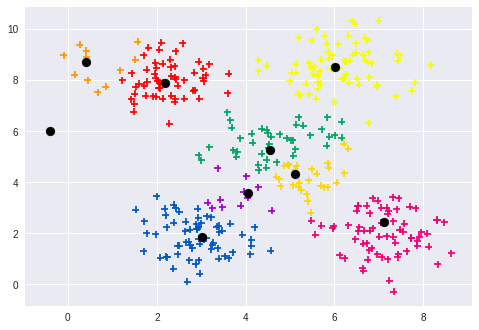

In [0]:
myMeanShift = MeanShift(bandwidth=1)
myMeanShift.fit(X)
labels = myMeanShift.labels_
final_Centroids2 = myMeanShift.cluster_centers_
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+',c=labels, cmap ="prism")
plt.scatter(final_Centroids2[:,0],final_Centroids2[:,1],marker="o",facecolor="black",
             s =80)

The estimated bandwidth is:  2.35


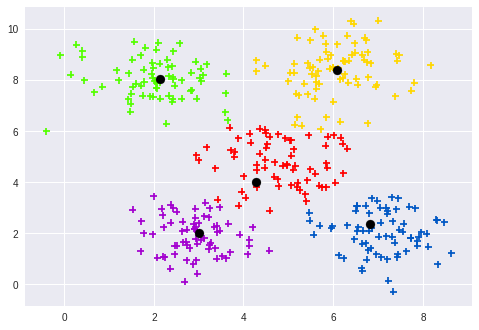

In [0]:
from sklearn.cluster import estimate_bandwidth

myBW = estimate_bandwidth(X,quantile=0.2); 
print("The estimated bandwidth is: ",np.round(myBW,2))
myMeanShift = MeanShift(bandwidth=myBW)
myMeanShift.fit(X)
labels = myMeanShift.labels_
final_Centroids2 = myMeanShift.cluster_centers_
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+',c=labels, cmap ="prism")
plt.scatter(final_Centroids2[:,0],final_Centroids2[:,1],marker="o",facecolor="black",
             s =80)


# 5- Guassian mixture model

## Concept

* The **Gaussian Mixture Model **is simply a** mixture** of **Gaussian models**.
* A Gaussian Model, is a model that makes the hypothesis that the data is drawn following the Gaussian distribution, or more exactly, the function: 
$f ( x ) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
> whre $\mu$ is the mean, and $\sigma$ is the standard deviation.





* Gaussian Mixture clustering consist of identifying to which distribution each point belongs.

* This identification is done using algorithms like: **Expectation-Maximization (EM)** algortihm.

## Example with scikit-learn

* Scikit-learn will use the expectation maximization algorithm to determine the different Gaussian distributions.

In [0]:

from sklearn.mixture import GaussianMixture


In [0]:
myGMM = GaussianMixture(n_components= 5,)
myGMM.fit(X)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

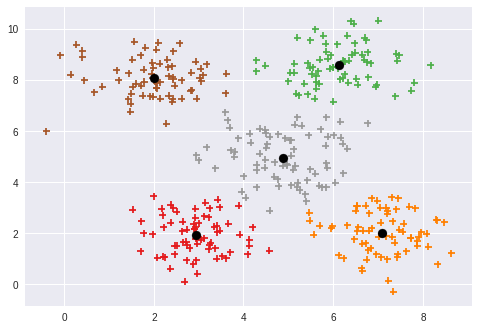

In [0]:
labels = myGMM.predict(X)
centroids= myGMM.means_
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+', c=labels,cmap ="Set1")
plt.scatter(centroids[:,0],centroids[:,1],marker="o",facecolor="black",
             s =80)

In [0]:
myGMM.means_

array([[2.93866761, 1.94247355],
       [6.12759508, 8.5681192 ],
       [7.0956042 , 2.02972811],
       [1.99605273, 8.06032511],
       [4.89055576, 4.96266136]])

## Selection of n_components

In [0]:
n_components = range(1,10)
bics=[]
aics=[]
for i in n_components:
  model = GaussianMixture(n_components=i)
  model.fit(X)
  bics.append(model.bic(X))
  aics.append(model.aic(X))

Text(0.5,1,'BIC scores')

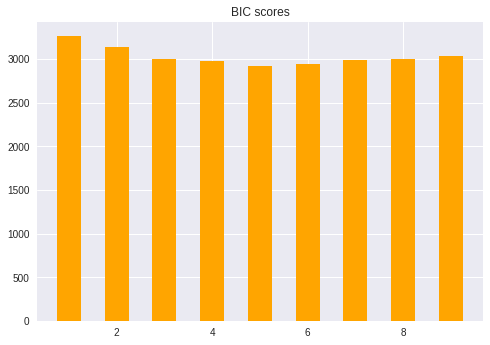

In [0]:
# plot the bic  values
plt.figure()
plt.bar(n_components, bics, width=0.5, color='orange', align='center')
plt.title('BIC scores')



Text(0.5,1,'AIC scores')

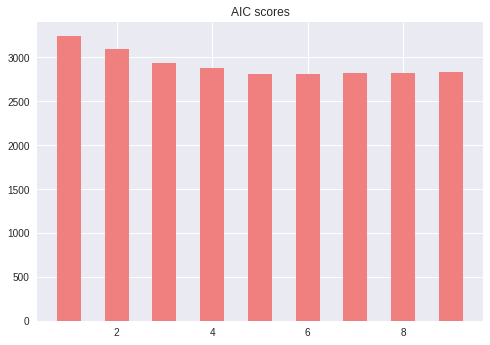

In [0]:
# plot the aic values
plt.figure()
plt.bar(n_components, aics, width=0.5, color='lightcoral', align='center')
plt.title('AIC scores')


In [0]:
np.round(aics,2)

array([3244.22, 3096.53, 2931.99, 2884.79, 2808.95, 2808.76, 2826.23,
       2820.11, 2830.73])

In [0]:
np.round(bics,2)

array([3263.51, 3138.96, 2997.58, 2973.52, 2920.83, 2943.78, 2984.41,
       3001.44, 3035.2 ])

# 6- Affinity Propagation model

## Concept


* An other clustering method: **Affinity propagation model**. It is defined by these  terms : **Exemplars**, **responsibility**, **availability**,**preference**, **damping facto**r and** message passing**.

 * ** Exemplars:** are the clusters centers.
 * **Preference** influence the resulting number of clusters by affecting a preference value for a sample to be an exemplar (its similarity score between it and itself).
 * **Message:** responsibility or availability values.
 * **Message passing: **responsibility and availability calculation
 * **Responsibility $r(i,k)$:** accumulated evidence that the sample k should be the exemplar of i. 
 * **Availability $a(i,k)$:** accumulated evidence that the sample i should select k to be its exemplar.
 * **Damping factor**  $\lambda$   : influence the resulting number of clusters by affecting a value for the relationship between new and current messages values. Must be$ >= 0.5$ and $< 1$.



## Process

* Select a similarity measure. For example, the **negative** of Euclidean Distance
* Select preferences and a damping factor values. 
* Set $r$ and $a$ matrices  to $0$. Fill $S$ with the similarity scores between all points. Its diagonal is filled with the preferences values.
* **Repeat until convergence** (changes for exemplars values are too small or non-existent) **is reached**
  * Compute $r$ using this formulas: 
    * $r_{t+1}(i, k) = s(i, k) - max [ a_t(i, k') + s(i, k') \forall k' \neq k ]$
    * $r_{t+1}(i, k) = \lambda\cdot r_{t}(i, k) + (1-\lambda)\cdot r_{t+1}(i, k)$
  * Compute $a$ using this formulas:
    * $a_{t+1}(i, k) = min [0, r_{t+1}(k, k) + \sum_{i'~,~i' \notin \{i, k\}}{r(i', k)}]$
    * $a_{t+1}(i, k) = \lambda\cdot a_{t}(i, k) + (1-\lambda)\cdot a_{t+1}(i, k)$

 

* Select the exemplars from: $r(i,i) + a(i,i) >0$


## Example

In [0]:
from sklearn.cluster import AffinityPropagation
# initialization of the model with default values
myModel= AffinityPropagation()


In [0]:
myModel.fit(X)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

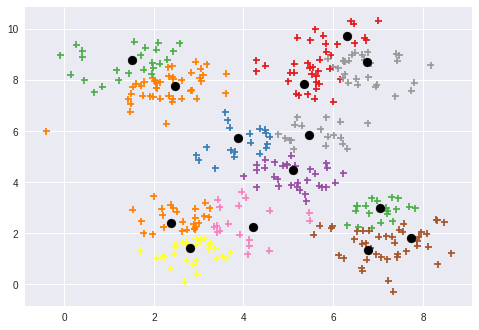

In [0]:
labels = myModel.labels_
centroids= myModel.cluster_centers_
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+', c=labels,cmap ="Set1")
plt.scatter(centroids[:,0],centroids[:,1],marker="o",facecolor="black",
             s =80)

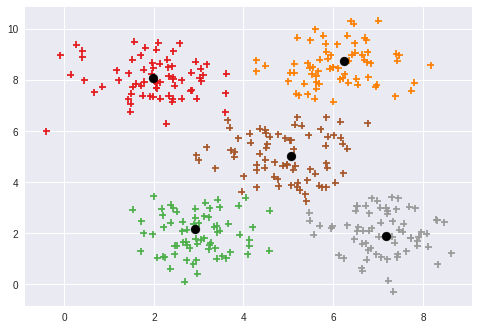

In [0]:
# personalize the preference
myModel= AffinityPropagation(preference=-100)
myModel.fit(X)

labels = myModel.labels_
centroids= myModel.cluster_centers_
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='+', c=labels,cmap ="Set1")
plt.scatter(centroids[:,0],centroids[:,1],marker="o",facecolor="black",
             s =80)


# References

* Aurélien Géron. Hands-on machine learning with Scikit-Learn and Tensor-
Flow: concepts, tools, and techniques to build intelligent systems. O’Reilly
Media, Inc, 2017.
* matplotlib.org. color example code: colormaps_reference.py. On-line at https://matplotlib.org/examples/color/colormaps_reference.html. Accessed on 24-12-2018.
* matplotlib.org. color example code: named_colors.py. On-line at https://matplotlib.org/examples/color/named_colors.html. Accessed on 24-12-2018.
* Joshi Prateek. Artificial intelligence with Python. Packt Publishing, 2017.
*  Vink Ritchie. Algorithm breakdown: Affinity propagation.
On-line at https://www.ritchievink.com/blog/2018/05/18/
algorithm-breakdown-affinity-propagation/, May 2018. Accessed on 24-12-2018.
* Scikit-learn.org. scikit-learn, machine learning in python. On-line at https://scikit-learn.org/stable/. Accessed on 03-11-2018.
* wikipedia.org. Affinity propagation. On-line at https://en.wikipedia.org/wiki/Affinity_propagation. Accessed on 24-12-2018.
* wikipedia.org. Mean shift. On-line at https://en.wikipedia.org/wiki/Mean_shift. Accessed on 24-12-2018.